<a href="https://colab.research.google.com/github/kocelifk/Keras-Image-Data-Augmentation/blob/main/Image_Data_Augmentation_Keras_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Data Augmentation with Keras



**Görev 1:** Kütüphanelerin import edilmesi

In [45]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.8.0


**Görev 2:** Rotasyon

In [46]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 40
)

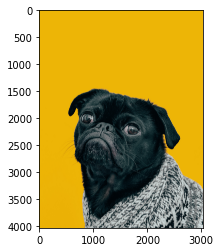

In [50]:
image_path = '/content/cat.jpg'

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 2 classes.


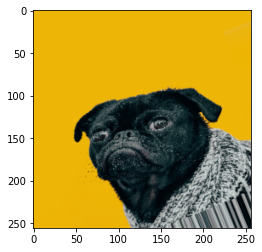

In [49]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

**Görev 3:** Genişlik ve yükseklik kaydırması

In [51]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range =[-100,-50,0,50,100],
    height_shift_range = [-50,0,50]
)

Found 1 images belonging to 2 classes.


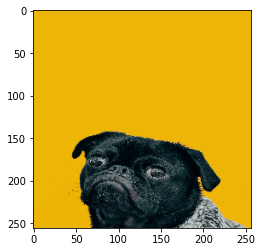

In [52]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

**Görev 4:** Parlaklık 

Found 1 images belonging to 2 classes.


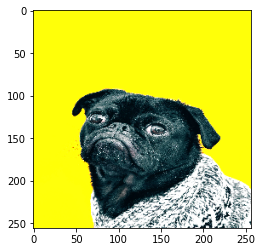

In [71]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
   brightness_range = (0.5, 2.)
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

**Görev 5:** Kırpmak

Found 1 images belonging to 2 classes.


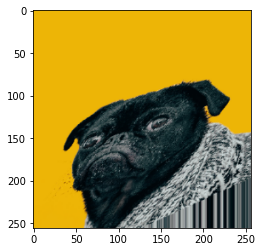

In [74]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range = 40
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

**Görev 6:** Zoom

Found 1 images belonging to 2 classes.


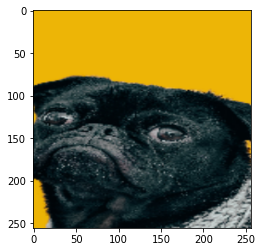

In [55]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range = 0.5
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

**Görev 7:** Kanal kaydırma

Found 1 images belonging to 2 classes.


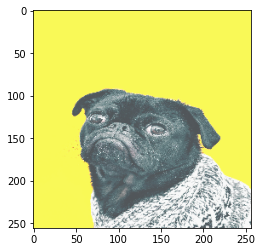

In [56]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range = 100
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [57]:
x.mean()

176.74522

In [58]:
np.array(Image.open(image_path)).mean()

112.95391814776322

**Görev 8:** Çevirme

Found 1 images belonging to 2 classes.


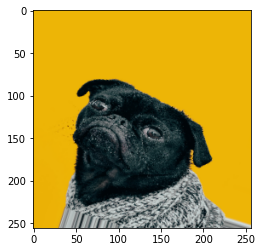

In [61]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=False,
    rotation_range = 30
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

**Görev 9:** Normalizasyon
* ***Featurewise***

In [62]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True
)

generator.fit(x_train)

In [63]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

-1.641065 0.6139937 [[9]]
120.70756512369792


* ***Samplewise***

In [64]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center =True,
    samplewise_std_normalization=True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

3.973643e-08 0.99999994 [[5]]


**Görev 10:** Yeniden Ölçeklendirme ve Ön İşleme

In [65]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.,
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input
)

In [66]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [67]:
print(x.mean(), x.std(), y)

0.13020325 0.35030907 [[2]]


**Görev 11:** Model Eğitiminde Kullanma 

In [68]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input,
    horizontal_flip=True,
    rotation_range=20
)

In [69]:
model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(
        include_top = False, input_shape = (32,32,3),
        pooling='avg'
    ),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [70]:
_= model.fit(
    generator.flow(x_train, y_train, batch_size = 32),
    epochs=1, steps_per_epoch=10
)

10/10 [==============================] - 8s 274ms/step - loss: 3.2331 - accuracy: 0.1219
